<a href="https://colab.research.google.com/github/kyohmin/RainPrediction/blob/main/RainPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.0 - Preparation**

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn import svm
from sklearn.utils import class_weight
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb

from scikeras.wrappers import KerasClassifier

##**1.1 - Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
originalDF = pd.read_csv("/content/drive/My Drive/weather_dataset/weather.csv", delimiter=",")

Mounted at /content/drive


In [ ]:
# Copy Dataset for Easier Hyperparameter Setting
df = originalDF.copy()

In [ ]:
print("Amount of Data (# of rows):\t\t",df.shape[0],"\nAmount of Features (# of Columns):\t",df.shape[1])

Amount of Data (# of rows):		 145460 
Amount of Features (# of Columns):	 23


##**1.2 - Data Overview**

In [ ]:
# Checking Missing Data Percentage
print((df.isnull().sum()/df.shape[0])*100)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


In [ ]:
# Checking percentiles and outliers
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# Checking Data Format
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

##**1.3 - Minor Preprocessing (Formatting)**

In [ ]:
# Date Format [String -> Datetime]
df['Date'] = pd.to_datetime(df['Date'])
print(type(df['Date'].iloc[0]), df['Date'].iloc[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2008-12-01 00:00:00


In [ ]:
# RainToday & RainTomorrow [String -> Float32]
conversion = {'Yes':True, 'No':False}
df['RainToday'] = df['RainToday'].map(conversion)
df['RainTomorrow'] = df['RainTomorrow'].map(conversion)
df[['RainToday', 'RainTomorrow']] = df[['RainToday', 'RainTomorrow']].astype("float32")

##**1.4 - Data Visualization**

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'WindGustSpeed'}>],
       [<Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>],
       [<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>],
       [<Axes: title={'center': 'RainToday'}>,
        <Axes: title={'center': 'RainTomorrow'}>, <Axes: >, <Axes: >]],
      dtype=object)

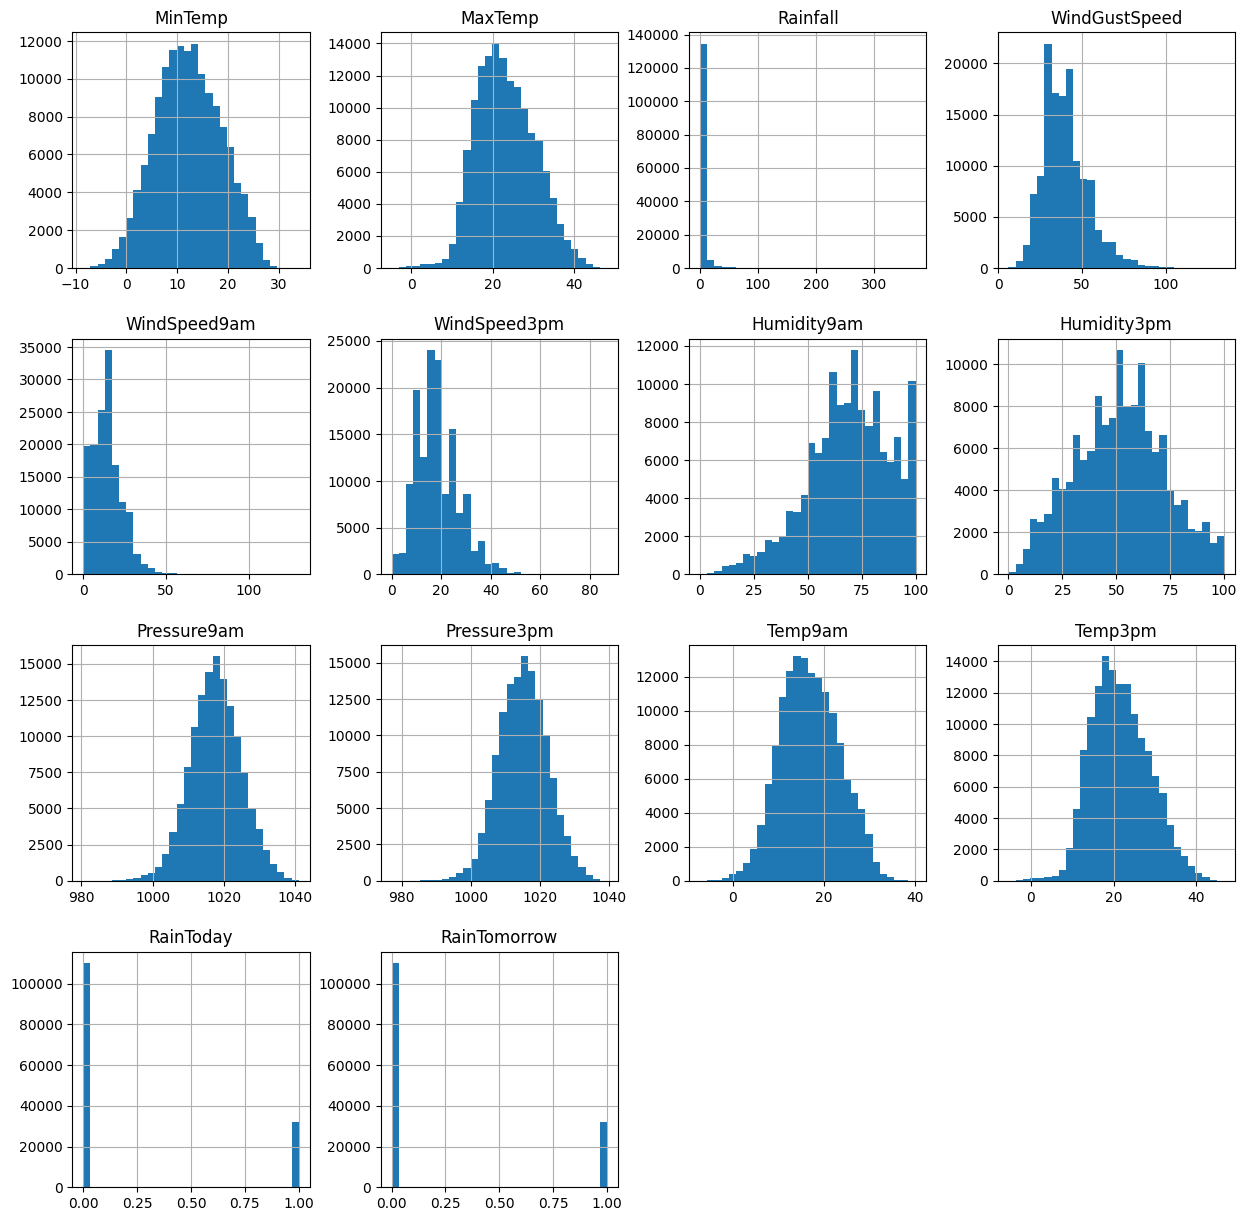

In [ ]:
# Data Distribution - Histogram
df.hist(column=['MinTemp', 'MaxTemp', 'Rainfall',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm',
                'Temp9am','Temp3pm', 'RainToday','RainTomorrow'],
        bins=30, figsize=(15,15))

In [ ]:
# Checking how much data is imbalanced
ratio = df['RainTomorrow'].value_counts().values
print(f"[Imbalanced Ratio: %.3f]" % (ratio[0]/(ratio[0]+ratio[1])))

[Imbalanced Ratio: 0.776]


<Axes: >

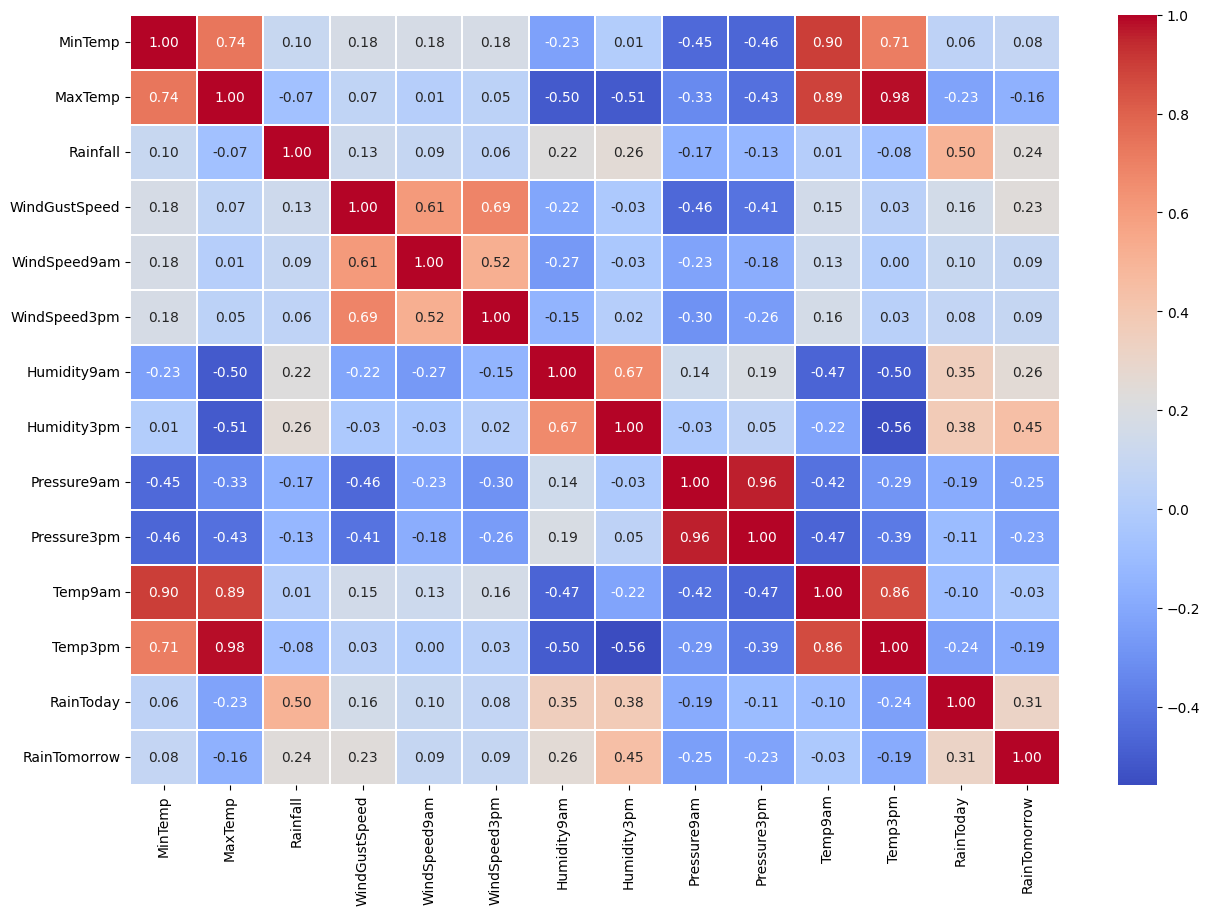

In [ ]:
# Correlation value - Data Correlation Matrix
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df[['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed',
                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
                'RainTomorrow']].corr(),
            annot=True, linewidth=0.3, fmt="0.2f", ax=ax, cmap="coolwarm")

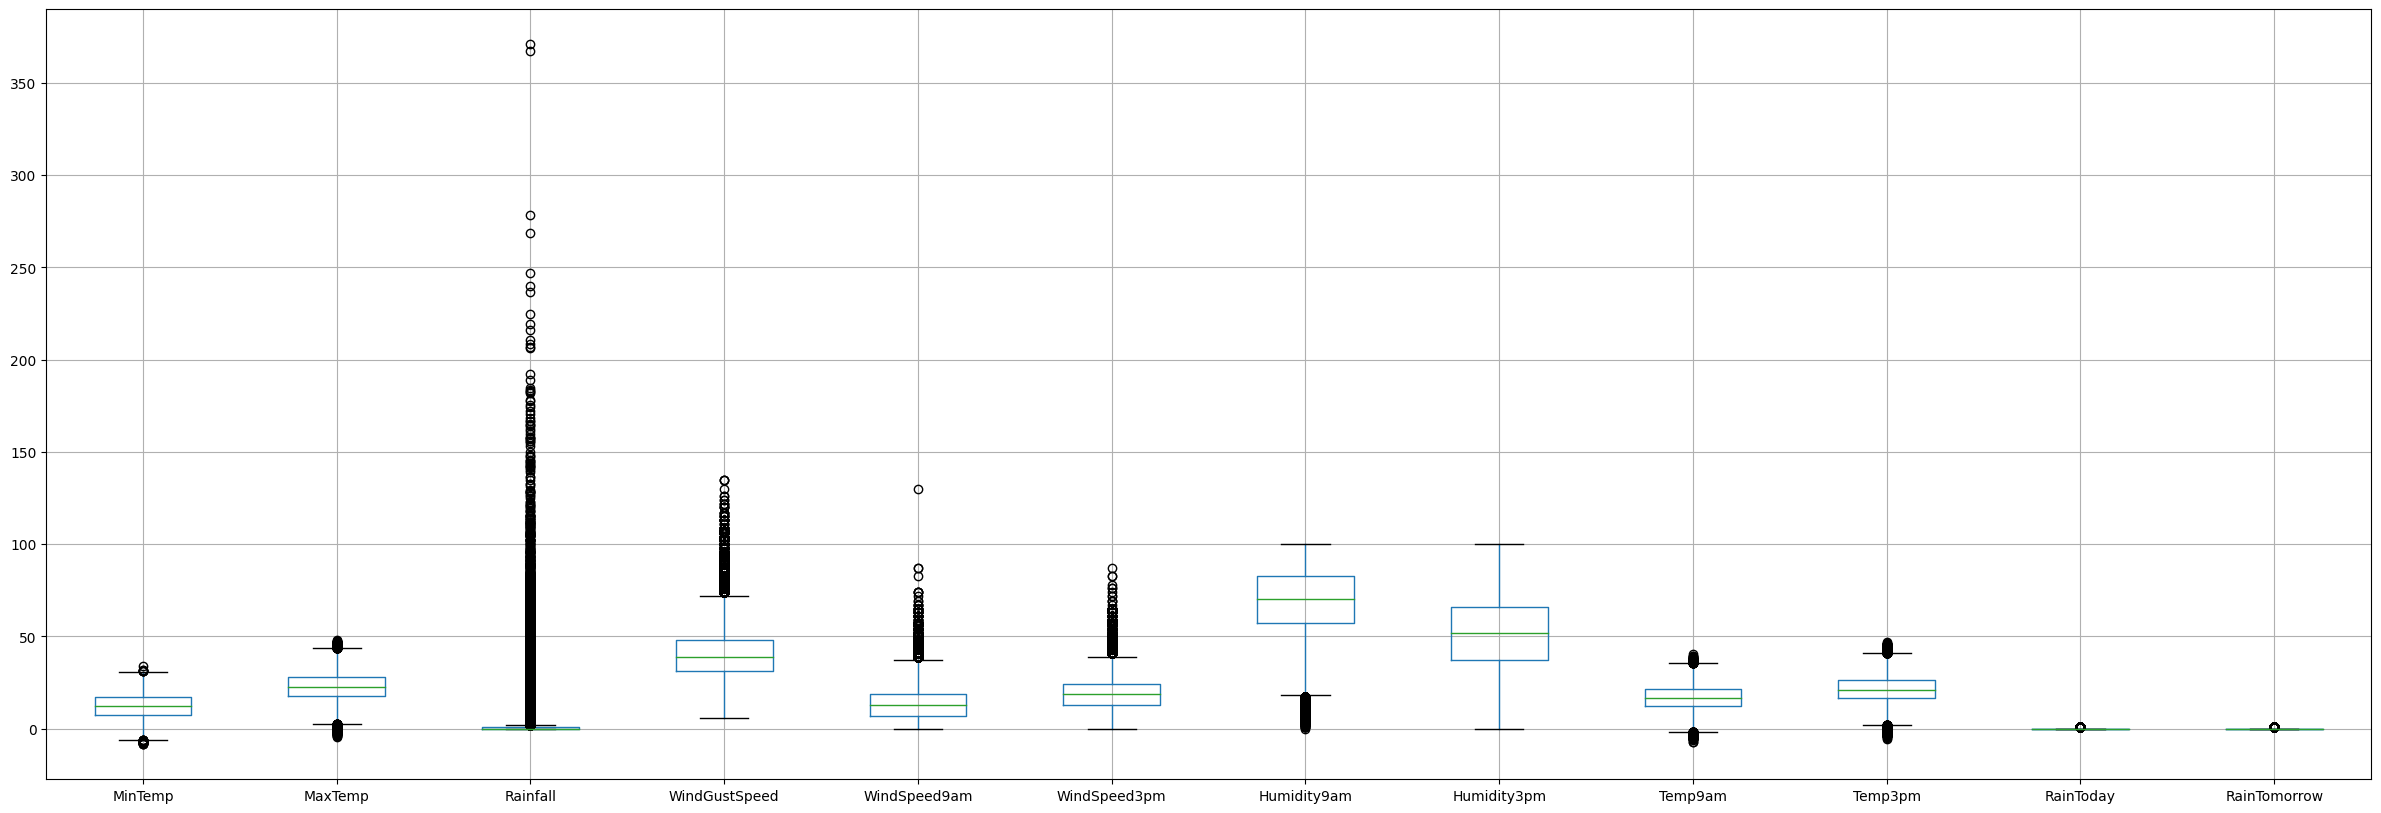

In [ ]:
# Outliers - Box plot without Pressure(different range)
df[['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday',
    'RainTomorrow']].boxplot(figsize=(30,10))
plt.show()

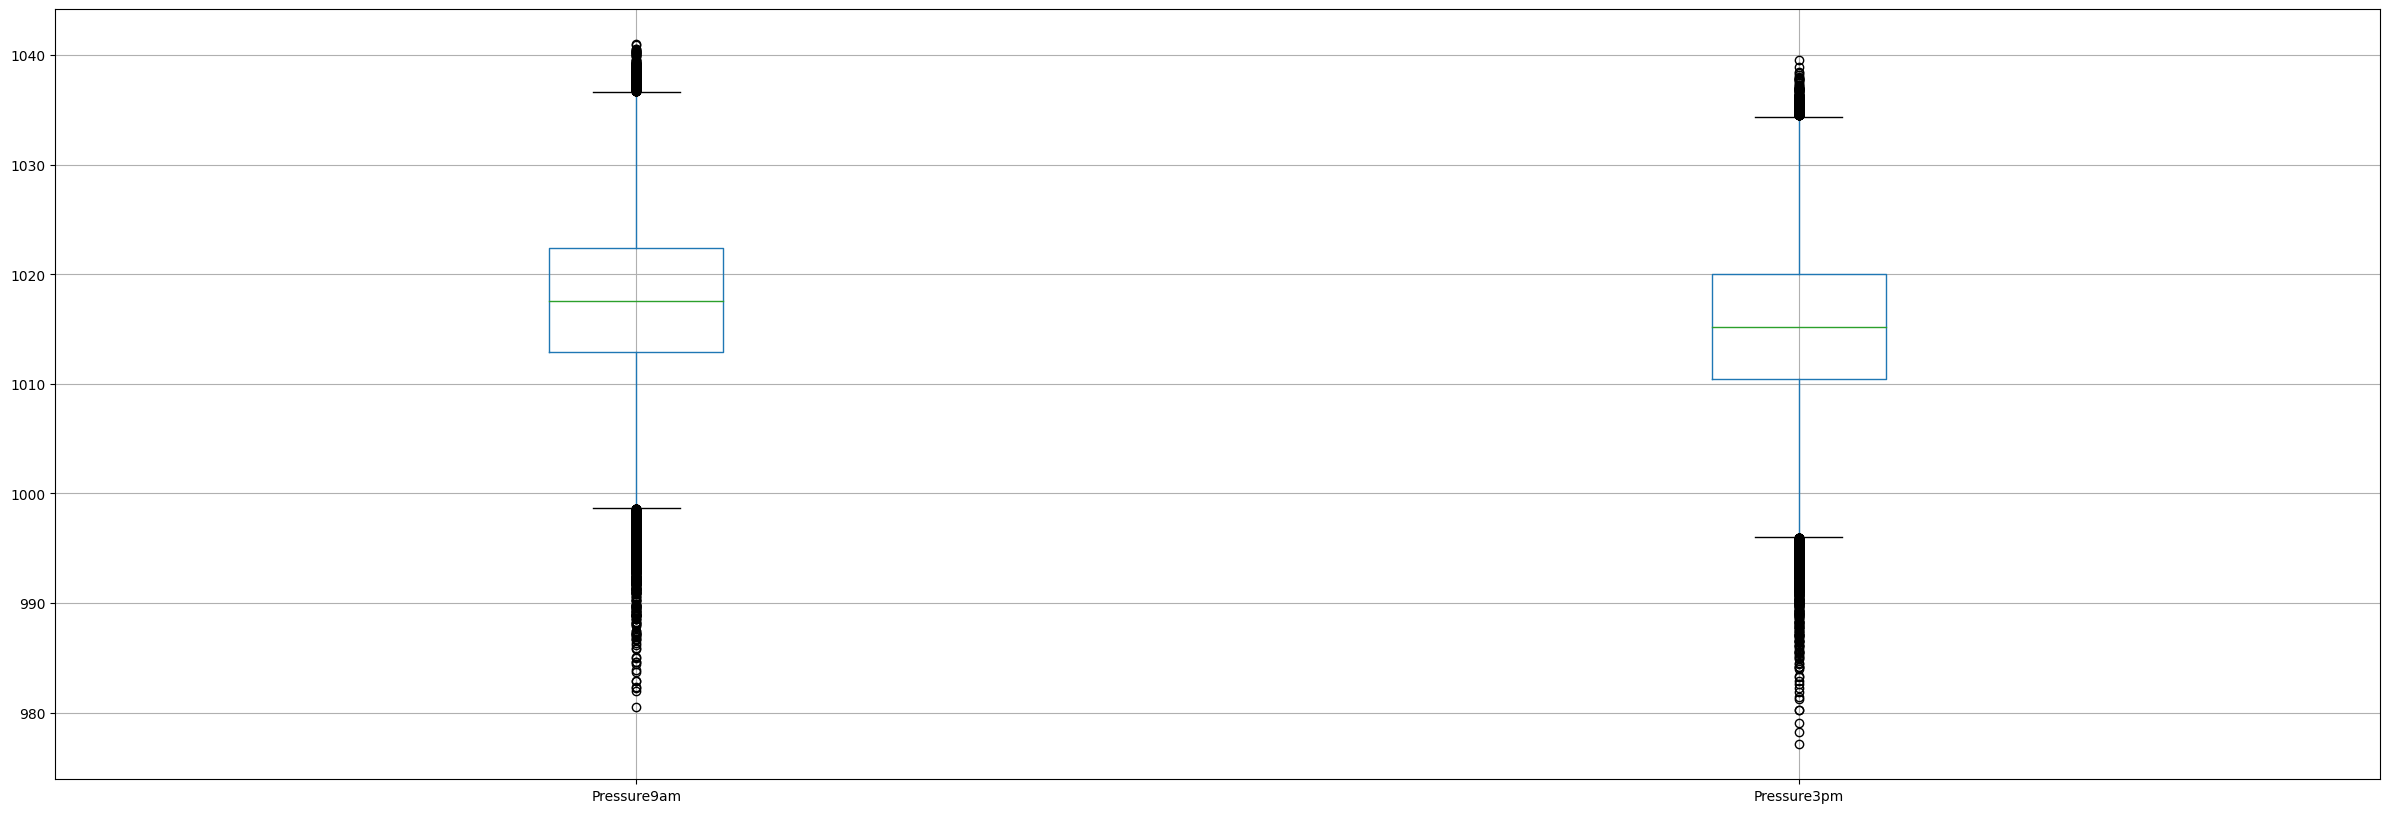

In [ ]:
# Outliers - Box plot
df[['Pressure9am', 'Pressure3pm']].boxplot(figsize=(30,10))
plt.show()

#**2.0 - Preprocessing**

##**2.1 - Feature Selection**

In [ ]:
# Drop rows with missing 'target' (RainTomorrow) Value
df = df[df['RainTomorrow'].notna()]
df.reset_index(drop=True, inplace=True)

# Drop 'Evaporation','Sunshine','Cloud9am','Cloud3pm' - High Missing Value Ratio
df = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

# Drop Columns with High Correlation Value
df = df.drop(['Temp9am', 'Temp3pm', 'Pressure3pm'], axis=1)

In [ ]:
# Show new missing value ratio
print((df.isnull().sum()/df.shape[0])*100)

Date             0.000000
Location         0.000000
MinTemp          0.447983
MaxTemp          0.226453
Rainfall         0.988797
WindGustDir      6.561504
WindGustSpeed    6.519308
WindDir9am       7.041838
WindDir3pm       2.656952
WindSpeed9am     0.948007
WindSpeed3pm     1.849599
Humidity9am      1.247600
Humidity3pm      2.538803
Pressure9am      9.855619
RainToday        0.988797
RainTomorrow     0.000000
dtype: float64


##**2.2 - Train Test Split**

In [ ]:
# Stratified Split
train, test = train_test_split(df, random_state=42, test_size=0.1, stratify=df[['RainTomorrow']])

# Split Label
train_x, train_y = train.drop('RainTomorrow', axis=1), train['RainTomorrow']
test_x, test_y = test.drop('RainTomorrow', axis=1), test['RainTomorrow']

# Reset Row Index
train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [ ]:
# Show Data Split Count and Ratio
trainCount = train['RainTomorrow'].value_counts().values
testCount = train['RainTomorrow'].value_counts().values

# Count
print("Train -",train['RainTomorrow'].value_counts())
print("\nTest -",test['RainTomorrow'].value_counts())

# Ratio
print(f"\n[Train Ratio: %.3f]" % (testCount[0]/(testCount[0]+testCount[1])))
print(f"[Test Ratio: %.3f]" % (trainCount[0]/(trainCount[0]+trainCount[1])))

Train - RainTomorrow
0.0    99284
1.0    28689
Name: count, dtype: int64

Test - RainTomorrow
0.0    11032
1.0     3188
Name: count, dtype: int64

[Train Ratio: 0.776]
[Test Ratio: 0.776]


##**2.3 - Format Modification (One-Hot Encoding)**

In [ ]:
# Number of Unique Values
print("Location Unique Values:", len(df['Location'].unique()))
print("WindGustDir Unique Values:", len(df['WindGustDir'].unique()))
print("WindDir9am Unique Values:", len(df['WindDir9am'].unique()))
print("WindDir3pm Unique Values:", len(df['WindDir3pm'].unique()))

Location Unique Values: 49
WindGustDir Unique Values: 17
WindDir9am Unique Values: 17
WindDir3pm Unique Values: 17


In [ ]:
# Drop Columns not in use
train_x = train_x.drop('WindGustDir', axis=1)
test_x = test_x.drop('WindGustDir', axis=1)

train_x = train_x.drop('WindDir9am', axis=1)
test_x = test_x.drop('WindDir9am', axis=1)

train_x = train_x.drop('WindDir3pm', axis=1)
test_x = test_x.drop('WindDir3pm', axis=1)

In [ ]:
# One Hot Encoding - Month, Location, and RainToday
train_x['Month'] = train_x['Date'].dt.month
test_x['Month'] = test_x['Date'].dt.month

train_x = train_x.drop('Date', axis=1)
test_x = test_x.drop('Date', axis=1)

categorical = ["Month", "Location", "RainToday"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

trainEncoded = encoder.fit_transform(train_x[categorical])
testEncoded = encoder.transform(test_x[categorical])

trainDF = pd.DataFrame(trainEncoded, columns=encoder.get_feature_names_out(categorical))
testDF = pd.DataFrame(testEncoded, columns=encoder.get_feature_names_out(categorical))

# New train_x and test_x
train_x = pd.concat([train_x.drop(categorical, axis=1), trainDF], axis=1)
test_x = pd.concat([test_x.drop(categorical, axis=1), testDF], axis=1)

In [ ]:
# List Columns
train_x.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_P

In [ ]:
# Columns Count
print("Total # of Columns:", len(train_x.columns.tolist()))

Total # of Columns: 73


##**2.4 - Missing Value Imputation**

In [ ]:
# Impute Missing Data 'Mean' of Training Set
imputer = SimpleImputer(strategy='mean')

trainImputed = imputer.fit_transform(train_x)
testImputed = imputer.transform(test_x)

train_x = pd.DataFrame(trainImputed, columns=train_x.columns)
test_x = pd.DataFrame(testImputed, columns=test_x.columns)

In [ ]:
# Missing Values Percentage
(test_x.isnull().sum()/test_x.shape[0])*100

MinTemp                0.0
MaxTemp                0.0
Rainfall               0.0
WindGustSpeed          0.0
WindSpeed9am           0.0
                      ... 
Location_Wollongong    0.0
Location_Woomera       0.0
RainToday_0.0          0.0
RainToday_1.0          0.0
RainToday_nan          0.0
Length: 73, dtype: float64

##**2.6 - Data Scaling**

In [ ]:
# StandardScaler - Handled Outliers
continuousCols = ["MinTemp", "MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am",
                  "WindSpeed3pm", "Humidity9am","Humidity3pm","Pressure9am"]

scaler = RobustScaler()

trainConScaled = scaler.fit_transform(train_x[continuousCols])
testConScaled = scaler.transform(test_x[continuousCols])

trainConDF = pd.DataFrame(trainConScaled, columns=scaler.get_feature_names_out(continuousCols))
testConDF = pd.DataFrame(testConScaled, columns=scaler.get_feature_names_out(continuousCols))

train_x = pd.concat([train_x.drop(continuousCols, axis=1), trainConDF], axis=1)
test_x = pd.concat([test_x.drop(continuousCols, axis=1), testConDF], axis=1)

#**3.0 - Training Models**

##**3.1 - Logistic Regression Model**

In [ ]:
# Logistic Regression
logistic = LogisticRegression()
logistic.fit(train_x, train_y)
logistic.score(test_x, test_y)
print(classification_report(test_y, logistic.predict(test_x).round(),target_names=["No Rain", "Rain"]))
print(accuracy_score(test_y, logistic.predict(test_x).round()))

              precision    recall  f1-score   support

     No Rain       0.86      0.95      0.90     11032
        Rain       0.73      0.48      0.58      3188

    accuracy                           0.84     14220
   macro avg       0.80      0.72      0.74     14220
weighted avg       0.83      0.84      0.83     14220

0.8445850914205345


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0. 0. 1. ... 0. 0. 0.]


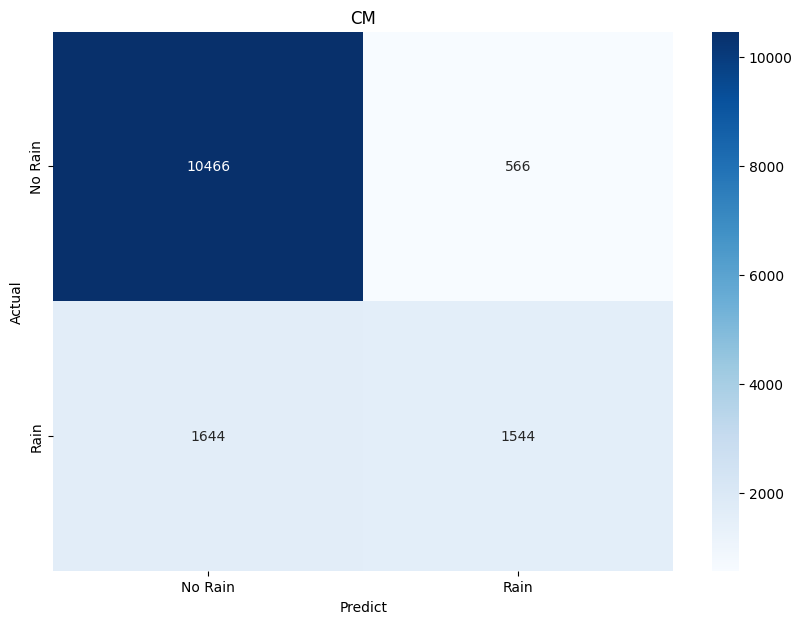

In [ ]:
predict_y = logistic.predict(test_x)
print(predict_y.round())
cm = confusion_matrix(test_y,predict_y.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('CM')
plt.show()

##**3.2 - Balanced Logistic Regression Model**

In [ ]:
# Balanced Logistic Regression
balLogistic = LogisticRegression(class_weight='balanced')
balLogistic.fit(train_x, train_y)
balLogistic.score(test_x, test_y)
print(classification_report(test_y, balLogistic.predict(test_x).round(), target_names=["No Rain", "Rain"]))
print(accuracy_score(test_y, balLogistic.predict(test_x).round()))

              precision    recall  f1-score   support

     No Rain       0.92      0.79      0.85     11032
        Rain       0.51      0.76      0.61      3188

    accuracy                           0.79     14220
   macro avg       0.72      0.78      0.73     14220
weighted avg       0.83      0.79      0.80     14220

0.7850210970464135


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0. 0. 1. ... 0. 0. 0.]


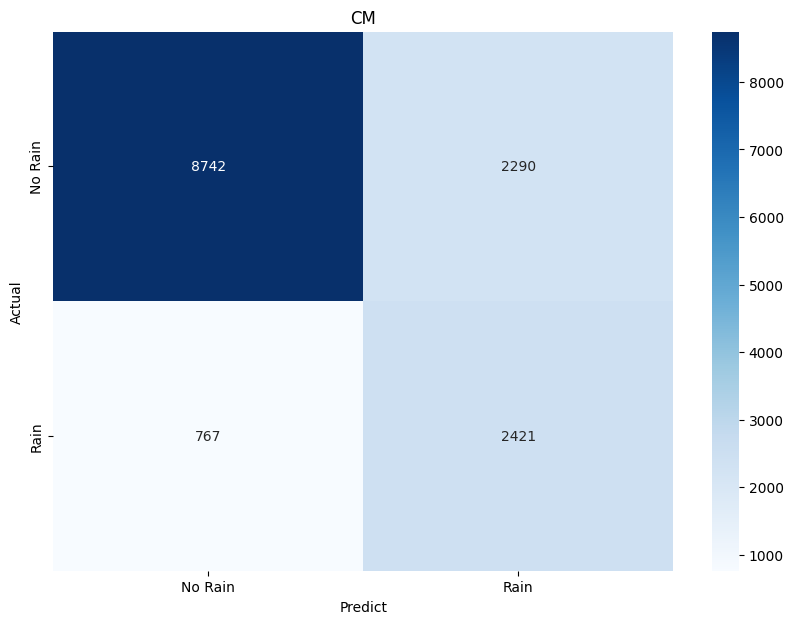

In [ ]:
predict_y = balLogistic.predict(test_x)
print(predict_y.round())
cm = confusion_matrix(test_y,predict_y.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('CM')
plt.show()

##**3.3 - Deep Neural Network Model**

In [ ]:
# Deep Neural Network
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_y), y=train_y)
cw = {0.:weights[0], 1.:weights[1]}
print(weights)

deepNN = Sequential()
deepNN.add(InputLayer((train_x.shape[1],)))
deepNN.add(Dense(16,'relu'))
deepNN.add(BatchNormalization())
deepNN.add(Dropout(0.3))
deepNN.add(Dense(16,'relu'))
deepNN.add(BatchNormalization())
deepNN.add(Dropout(0.3))
deepNN.add(Dense(8,'relu'))
deepNN.add(BatchNormalization())
deepNN.add(Dropout(0.3))
deepNN.add(Dense(8,'relu'))
deepNN.add(BatchNormalization())
deepNN.add(Dropout(0.3))
deepNN.add(Dense(1, 'sigmoid'))


checkpoint = ModelCheckpoint('deepNN.keras', save_best_only=True)
opt = tf.keras.optimizers.AdamW(learning_rate=0.001)
deepNN.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.F1Score(threshold=0.5)])
history = deepNN.fit(train_x,train_y, epochs=20, batch_size=128, callbacks=checkpoint)

[0.64447947 2.23034961]
Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - binary_accuracy: 0.7160 - f1_score: 0.3469 - loss: 0.5974
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.8182 - f1_score: 0.4676 - loss: 0.4273
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.8272 - f1_score: 0.4960 - loss: 0.4076
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.8317 - f1_score: 0.5125 - loss: 0.3986
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.8327 - f1_score: 0.5192 - loss: 0.3945
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.8371 - f1_score: 0.5339 - loss: 0.3831
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - binary_accuracy: 0.8367 - f1_score: 0.5365 - loss: 0.3865
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - binary_accuracy: 0.8383 - f1_score: 0.5365 - loss: 0.3800
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8375 - f1_score: 0.5392 - loss: 0.3808
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.8412 - f1_score: 0.5469

445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


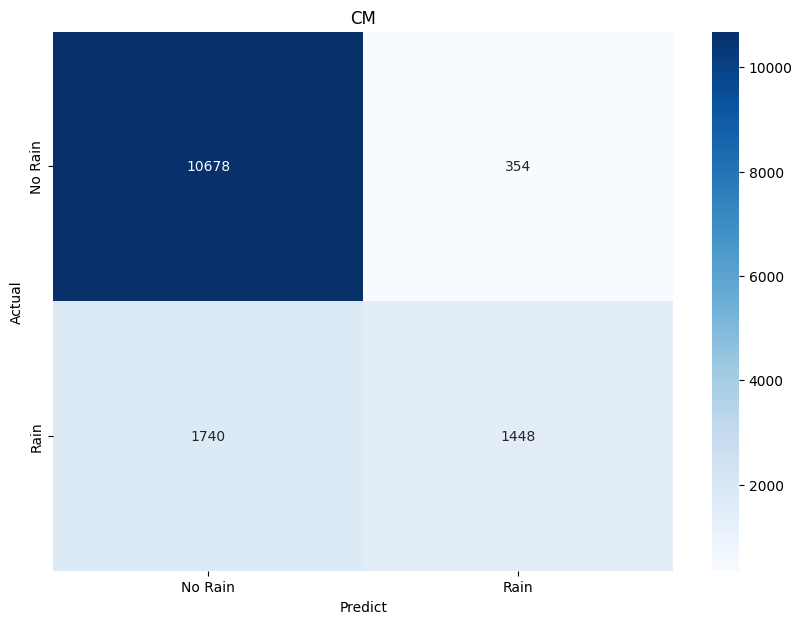

In [ ]:
predict_y = deepNN.predict(test_x)
print(predict_y.round())
cm = confusion_matrix(test_y,predict_y.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('CM')
plt.show()

##**3.3 - Balanced Deep Neural Netrok Model**

In [ ]:
# Balanced Deep Neural Network
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_y), y=train_y)
cw = {0.:weights[0], 1.:weights[1]}
print(weights)

balDeepNN = Sequential()
balDeepNN.add(InputLayer((train_x.shape[1],)))
balDeepNN.add(Dense(16,'relu'))
balDeepNN.add(BatchNormalization())
balDeepNN.add(Dropout(0.3))
balDeepNN.add(Dense(16,'relu'))
balDeepNN.add(BatchNormalization())
balDeepNN.add(Dropout(0.3))
balDeepNN.add(Dense(8,'relu'))
balDeepNN.add(BatchNormalization())
balDeepNN.add(Dropout(0.3))
balDeepNN.add(Dense(8,'relu'))
balDeepNN.add(BatchNormalization())
balDeepNN.add(Dropout(0.3))
balDeepNN.add(Dense(1, 'sigmoid'))


checkpoint = ModelCheckpoint('deepNN.keras', save_best_only=True)
opt = tf.keras.optimizers.AdamW(learning_rate=0.001)
balDeepNN.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.F1Score(threshold=0.5)])
history = balDeepNN.fit(train_x,train_y, epochs=20, batch_size=128, callbacks=checkpoint, class_weight = cw)

[0.64447947 2.23034961]
Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.5277 - f1_score: 0.3933 - loss: 0.7715
Epoch 2/20
  57/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.7016 - f1_score: 0.5310 - loss: 0.5690

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.7238 - f1_score: 0.5556 - loss: 0.5489
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.7589 - f1_score: 0.5847 - loss: 0.5194
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.7675 - f1_score: 0.5928 - loss: 0.5108
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.7774 - f1_score: 0.6000 - loss: 0.5000
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.7806 - f1_score: 0.6003 - loss: 0.4997
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.7778 - f1_score: 0.6076 - loss: 0.4902
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.7760 - f1_score: 0.6077 - loss: 0.4862
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.7753 - f1_score: 0.6072 - loss: 0.4831
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.7789 - f1_score: 0.6089

445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


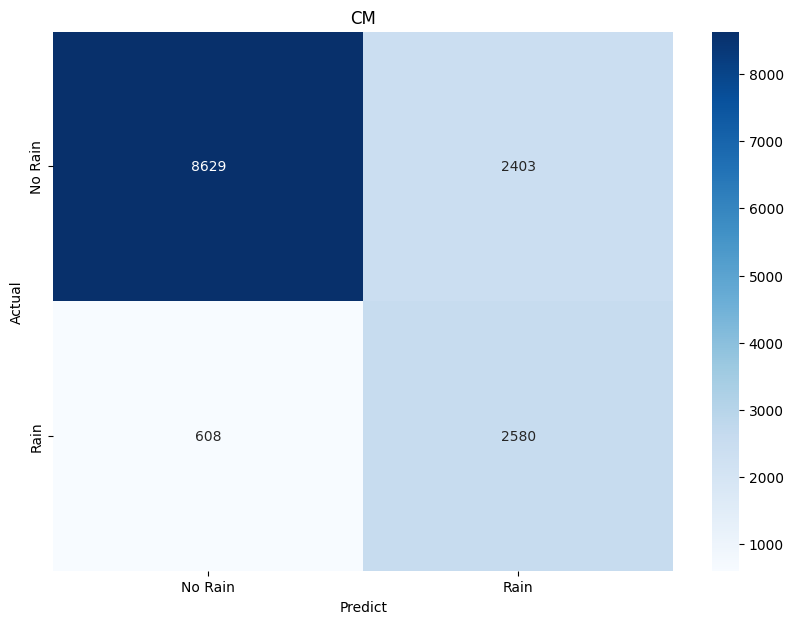

In [ ]:
predict_y = balDeepNN.predict(test_x)
print(predict_y.round())
cm = confusion_matrix(test_y,predict_y.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('CM')
plt.show()

##**3.4 - Ensemble Voting Model (Final Result)**

In [ ]:
# Voting Model with...
# 1. Logistic Regression
# 2. Balanced Logistic Regression
# 3. Deep Neural Network Model
# 4. Balanced Deep Neural Network Model

def deep_nn():
  model = Sequential()
  model.add(InputLayer((train_x.shape[1],)))
  model.add(Dense(16,'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(16,'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(8,'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(8,'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1, 'sigmoid'))

  opt = tf.keras.optimizers.AdamW(learning_rate=0.001)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.F1Score(threshold=0.5)])

  return model

deepNN = KerasClassifier(build_fn=deep_nn, epochs=20, batch_size=128)
balDeepNN = KerasClassifier(build_fn=deep_nn, epochs=20, class_weight=cw, batch_size=128)


votingModel = VotingClassifier(estimators=[('Logistic', logistic),
 ('Balanced Logistic', balLogistic),('DeepNN', deepNN),
 ('Balanced DeepNN', balDeepNN)], voting='soft', weights=(3,4,4,3))
votingModel.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.6745 - f1_score: 0.2466 - loss: 0.6264
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.8100 - f1_score: 0.4480 - loss: 0.4249
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.8240 - f1_score: 0.5155 - loss: 0.4018
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.8316 - f1_score: 0.5308 - loss: 0.3935
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.8309 - f1_score: 0.5401 - loss: 0.3924
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.8370 - f1_score: 0.5535 - loss: 0.3833
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.8370 - f1_score: 0.5501 - loss: 0.3837
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.8367 - f1_score: 0.5504 - loss: 0.3818
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.8415 - f1_sco

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.5877 - f1_score: 0.3833 - loss: 0.7062
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.7454 - f1_score: 0.5655 - loss: 0.5429
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - binary_accuracy: 0.7665 - f1_score: 0.5904 - loss: 0.5193
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - binary_accuracy: 0.7772 - f1_score: 0.5989 - loss: 0.5053
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - binary_accuracy: 0.7766 - f1_score: 0.6025 - loss: 0.4956
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - binary_accuracy: 0.7821 - f1_score: 0.6062 - loss: 0.4899
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.7787 - f1_score: 0.6045 - loss: 0.4911
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.7850 - f1_score: 0.6108 - loss: 0.4814
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.7846 - f1_sco

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('Balanced Logistic',
                              LogisticRegression(class_weight='balanced')),
                             ('DeepNN',
                              KerasClassifier(batch_size=128, build_fn=<function deep_nn at 0x79cc59fe2050>, epochs=20)),
                             ('Balanced DeepNN',
                              KerasClassifier(batch_size=128, build_fn=<function deep_nn at 0x79cc59fe2050>, class_weight={0.0: 0.6444794730268724, 1.0: 2.2303496113492978}, epochs=20))],
                 voting='soft', weights=(3, 4, 4, 3))

In [ ]:
print(classification_report(test_y, votingModel.predict(test_x).round(), target_names=["No Rain", "Rain"]))
print(accuracy_score(test_y, votingModel.predict(test_x).round()))

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

     No Rain       0.89      0.90      0.90     11032
        Rain       0.65      0.63      0.64      3188

    accuracy                           0.84     14220
   macro avg       0.77      0.76      0.77     14220
weighted avg       0.84      0.84      0.84     14220

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.8402250351617441


112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0. 0. 1. ... 0. 0. 0.]


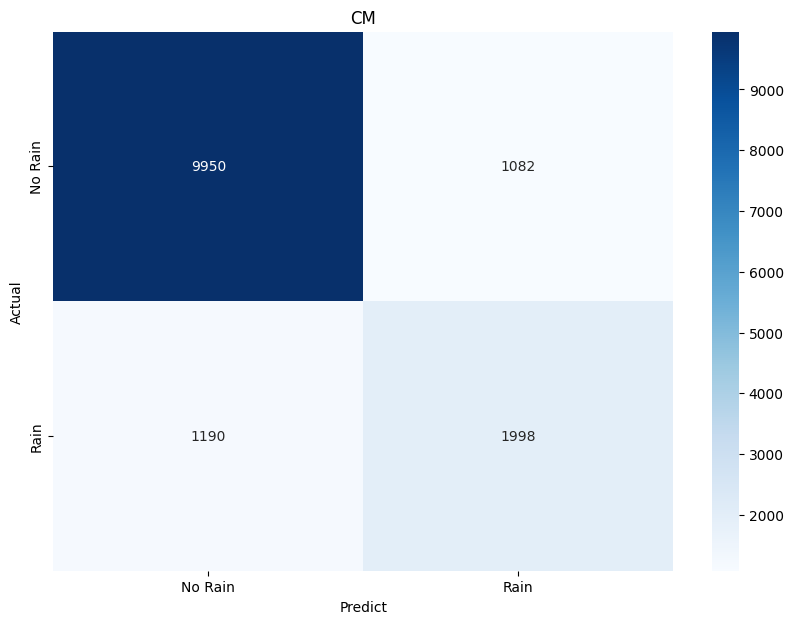

In [ ]:
predict_y = votingModel.predict(test_x)
print(predict_y.round())
cm = confusion_matrix(test_y,predict_y.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('CM')
plt.show()

#**4.0 - Predict with Custom Dataset**

In [ ]:
customDF = pd.read_csv("/content/drive/My Drive/weather_dataset/custom_dataset.csv", delimiter=",")
print("Amount of Data (# of rows):\t\t",customDF.shape[0],"\nAmount of Features (# of Columns):\t",customDF.shape[1])

Amount of Data (# of rows):		 20 
Amount of Features (# of Columns):	 12


In [ ]:
customDF.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday
0,1/1/25,Albury,10,22,1.0,30,20,24,71,22,1000.1,No
1,12/1/25,Albury,16,22,2.0,31,15,13,89,91,1001.1,No
2,8/1/25,Albury,7,25,0.0,20,19,26,38,30,1002.1,Yes
3,12/1/25,Albury,16,18,16.0,61,28,28,76,93,1003.1,Yes
4,11/1/25,Albury,6,30,1.0,65,7,20,82,33,1004.1,No


In [ ]:
customDF['Date'] = pd.to_datetime(customDF['Date'])
conversion = {'Yes':True, 'No':False}
customDF['RainToday'] = customDF['RainToday'].map(conversion)
customDF[['RainToday']] = customDF[['RainToday']].astype("float32")
customDF['Month'] = customDF['Date'].dt.month
customDF = customDF.drop('Date', axis=1)

categorical = ["Month", "Location", "RainToday"]
encoded = encoder.transform(customDF[categorical])
enDF = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical))
customDF = pd.concat([customDF.drop(categorical, axis=1), enDF], axis=1)

scaled = scaler.transform(customDF[continuousCols])
scaleDF = pd.DataFrame(scaled, columns=scaler.get_feature_names_out(continuousCols))
customDF = pd.concat([customDF.drop(continuousCols, axis=1), scaleDF], axis=1)

<ipython-input-88-78d3becdcbab>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customDF['Date'] = pd.to_datetime(customDF['Date'])


In [ ]:
predict_y = votingModel.predict(customDF)
print(predict_y.round())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
